# compute number of nodes

In [ ]:
driver = get_driver(file="../all_data/340.html", headless=False)
driver.get("file:///" + os.path.abspath("../all_data/WebSight_5.html"))   

In [21]:
from utils import *
import csv
# compute nodes count for each html file in the directory
def process_html_files_in_directory(directory, output_csv):
    html_files = [f for f in os.listdir(directory) if f.endswith('.html')]
    driver = get_driver(string="<html></html>")
    
    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["Filename", "Node_Count"])
        
        for filename in tqdm(html_files, desc="Processing"):
            file_path = os.path.join(directory, filename)
            try:
                print(f"Processing {file_path}")
                driver.get("file:///" + os.path.abspath(file_path))
                node_count = num_of_nodes(driver)
                writer.writerow([filename, node_count])
            except Exception as e:
                print(f"[ERROR] {filename}: {e}")
    driver.quit()

directory = '../all_data/'
output_csv = 'node_counts.csv'
process_html_files_in_directory(directory, output_csv)

Processing:   0%|          | 0/498 [00:00<?, ?it/s]

Processing ../all_data/340.html
Processing ../all_data/WebSight_5.html
Processing ../all_data/655.html
Processing ../all_data/WebSight_276.html
Processing ../all_data/WebSight_299.html
Processing ../all_data/252.html
Processing ../all_data/WebSight_108.html
Processing ../all_data/WebSight_221.html
Processing ../all_data/WebSight_83.html
Processing ../all_data/194.html
Processing ../all_data/244.html
Processing ../all_data/WebSight_237.html
Processing ../all_data/WebSight_95.html
Processing ../all_data/881.html
Processing ../all_data/WebSight_149.html
Processing ../all_data/WebSight_260.html
Processing ../all_data/585.html
Processing ../all_data/268.html
Processing ../all_data/WebSight_132.html
Processing ../all_data/WebSight_56.html
Processing ../all_data/842.html
Processing ../all_data/WebSight_165.html
Processing ../all_data/403.html
Processing ../all_data/WebSight_173.html
Processing ../all_data/946.html
Processing ../all_data/WebSight_17.html
Processing ../all_data/1135.html
Proces

# compute number of tags

In [22]:
from utils import *
import csv
# from single_file_cli import crawl
# crawl(600, 1200, "./data") # this will be extremely slow so you may need to use multiprocess or multithread to run several 

# driver = get_driver(file="./1c.html")
# node_count = num_of_nodes(driver)
# print(f"Number of nodes in the HTML file: {node_count}")
# driver.quit()
def gettag_html_files_in_directory(directory, output_csv):
    html_files = [f for f in os.listdir(directory) if f.endswith('.html')]
    driver = get_driver(string="<html></html>")
    
    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["Filename", "Tag_Count"])
        
        for filename in tqdm(html_files, desc="Processing"):
            file_path = os.path.join(directory, filename)
            try:
                driver.get("file:///" + os.path.abspath(file_path))
                node_count = num_of_tags(driver)
                writer.writerow([filename, node_count])
            except Exception as e:
                print(f"[ERROR] {filename}: {e}")
    driver.quit()

directory = '../all_data'
output_csv = 'tag_counts.csv'
gettag_html_files_in_directory(directory, output_csv)

Processing:   0%|          | 0/498 [00:00<?, ?it/s]

# number of unique tags

In [23]:
from utils import *
import csv

def uniquetag_html_files_in_directory(directory, output_csv):
    html_files = [f for f in os.listdir(directory) if f.endswith('.html')]
    driver = get_driver(string="<html></html>")
    
    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["Filename", "Unique_Tag_Count"])
        
        for filename in tqdm(html_files, desc="Processing"):
            file_path = os.path.join(directory, filename)
            try:
                driver.get("file:///" + os.path.abspath(file_path))
                node_count = num_of_unique_tags(driver)
                writer.writerow([filename, node_count])
            except Exception as e:
                print(f"[ERROR] {filename}: {e}")
    driver.quit()

directory = '../all_data'
output_csv = 'unique_tag_counts.csv'
uniquetag_html_files_in_directory(directory, output_csv)

Processing:   0%|          | 0/498 [00:00<?, ?it/s]

# compute depth

In [1]:
from utils import *
import csv

def depth_html_files_in_directory(directory, output_csv):
    html_files = [f for f in os.listdir(directory) if f.endswith('.html')]
    driver = get_driver(string="<html></html>")
    
    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["Filename", "MOD_Depth_Count"])
        
        for filename in tqdm(html_files, desc="Processing"):
            file_path = os.path.join(directory, filename)
            try:
                driver.get("file:///" + os.path.abspath(file_path))
                node_count = dom_tree_depth(driver)
                writer.writerow([filename, node_count])
            except Exception as e:
                print(f"[ERROR] {filename}: {e}")
    driver.quit()

directory = '../all_data'
output_csv = 'depth_counts.csv'
depth_html_files_in_directory(directory, output_csv)

Processing:   0%|          | 0/498 [00:00<?, ?it/s]

# count tokens

In [15]:
import os
import csv
from transformers import GPT2Tokenizer
from tqdm import tqdm

def count_tokens_in_html_files(directory, output_csv):
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    html_files = [f for f in os.listdir(directory) if f.endswith('.html')]

    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["Filename", "Token_Count"])
        for filename in tqdm(html_files, desc="Processing"):
            file_path = os.path.join(directory, filename)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    content = f.read()
                
                tokens = tokenizer.encode(content)
                token_count = len(tokens)
                
                writer.writerow([filename, token_count])
                # print(f"[INFO] Processed {filename}: {token_count} tokens")
            except Exception as e:
                print(f"[ERROR] {filename}: {e}")

directory = '../all_data'
output_csv = 'token_counts.csv'

count_tokens_in_html_files(directory, output_csv)

Processing: 100%|██████████| 498/498 [01:02<00:00,  7.93it/s]


# Calculate action list length

In [4]:
import os
import csv
from tqdm import tqdm
def get_action_list_len(directory, output_csv):
    json_files = [f for f in os.listdir(directory) if f.endswith('.json')]
    
    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["Filename", "Action_List_Len"])
        for filename in tqdm(json_files, desc="Processing"):
            file_path = os.path.join(directory, filename)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    data = json.load(f)
                    writer.writerow([filename, len(data)])
            except Exception as e:
                print(f"[ERROR] {filename}: {e}")

directory = '../all_data'
output_csv = 'action_list_len.csv'

get_action_list_len(directory, output_csv)

Processing: 100%|██████████| 500/500 [00:03<00:00, 137.27it/s]


# Merge result and calculate statistics

In [11]:
import pandas as pd

def merge_csv_files(file_list, output_csv):
    combined_df = pd.read_csv(file_list[0])
    for file in file_list[1:]:
        df = pd.read_csv(file)
        # replace windows backslash with unix forward slash
        df['Filename'] = df['Filename'].str.replace('.json', '.html')
        combined_df = pd.merge(combined_df, df, how='inner', on='Filename')
    combined_df.to_csv(output_csv, index=False, encoding='utf-8')

csv_files = ['node_counts.csv', 'tag_counts.csv', 'unique_tag_counts.csv', 'depth_counts.csv', 'token_counts.csv', 'action_list_len.csv']

output_csv = 'stat.csv'

merge_csv_files(csv_files, output_csv)

print(f"[INFO] CSV files have been successfully merged into {output_csv}")

[INFO] CSV files have been successfully merged into stat.csv


In [12]:
import pandas as pd

# Load the CSV file
file_path = 'stat.csv'
data = pd.read_csv(file_path)

# Separate the data based on the filename prefix to distinguish "WebSight" files from numbered files
websight_data = data[data['Filename'].str.contains("WebSight", case=False)]
numbered_data = data[~data['Filename'].str.contains("WebSight", case=False)]

# Calculate statistics for each group
statistics = {
    "Dataset": ["Synthetic", "Real World"],
    "Size": [len(websight_data), len(numbered_data)],
    "Avg Length (tokens)": [
        f"{websight_data['Token_Count'].mean():.0f}±{websight_data['Token_Count'].std():.0f}",
        f"{numbered_data['Token_Count'].mean():.0f}±{numbered_data['Token_Count'].std():.0f}",
    ],
    "Avg Tag Count": [
        f"{websight_data['Tag_Count'].mean():.0f}±{websight_data['Tag_Count'].std():.0f}",
        f"{numbered_data['Tag_Count'].mean():.0f}±{numbered_data['Tag_Count'].std():.0f}",
    ],
    "Avg DOM Depth": [
        f"{websight_data['MOD_Depth_Count'].mean():.0f}±{websight_data['MOD_Depth_Count'].std():.0f}",
        f"{numbered_data['MOD_Depth_Count'].mean():.0f}±{numbered_data['MOD_Depth_Count'].std():.0f}",
    ],
    "Avg Unique Tags": [
        f"{websight_data['Unique_Tag_Count'].mean():.0f}±{websight_data['Unique_Tag_Count'].std():.0f}",
        f"{numbered_data['Unique_Tag_Count'].mean():.0f}±{numbered_data['Unique_Tag_Count'].std():.0f}",
    ],
    "Avg Action List Length": [
        f"{websight_data['Action_List_Len'].mean():.0f}±{websight_data['Action_List_Len'].std():.0f}",
        f"{numbered_data['Action_List_Len'].mean():.0f}±{numbered_data['Action_List_Len'].std():.0f}",
    ],
}

# Create DataFrame to display statistics
statistics_df = pd.DataFrame(statistics)
statistics_df.to_csv('summary.csv', index=False, encoding='utf-8-sig')
print(statistics_df)

      Dataset  Size Avg Length (tokens) Avg Tag Count Avg DOM Depth  \
0   Synthetic   300             692±227          18±7           5±1   
1  Real World   198       113724±139761       543±768          15±6   

  Avg Unique Tags Avg Action List Length  
0            10±3                    3±2  
1            22±8                 92±130  


# Topic Distribution

In [ ]:
import sys
sys.path.append('../../experiment/')
from bots import GPT4
from bs4 import BeautifulSoup

PROMPT = """
Using the following HTML code, classify the website into one of the predefined categories, respond with the category only. Consider the site's structure, content, and layout based on the HTML snippet provided. The categories and their descriptions are as follows:
	1.	Company/Organization Site - Websites representing companies, organizations, or institutions. These typically contain information about the organization's mission, services, contact information, and may have sections for news, events, or product offerings.
	2.	Blog - Personal or professional blogs, including technical blogs. Blogs generally have a chronological listing of articles or posts, author names, dates, tags, and may include a comments section.
	3.	Homepage - Personal homepages or main landing pages that represent an individual. These may include personal information, portfolios, hobbies, or contact details and often serve as an individual’s online presence.
	4.	Information Site - Websites focused on sharing structured information, such as Wikipedia pages, FAQs, policy pages, online dictionaries, or encyclopedias. These sites often have static, reference-like content organized into sections or articles.
	5.	Forum - Online discussion forums or community boards where users post messages, replies, and engage in conversations. Forums typically have categories, threads, and user-generated content with timestamps and usernames.
	6.	News Site - News article pages or portals focused on current events. These usually have publication dates, author names, headlines, and structured content related to recent news or topics of public interest.
	7.	Product Page - Pages dedicated to product descriptions and specifications. These pages may include product images, pricing, features, customer reviews, and purchase options.
	8.	Other - Any other genre that doesn't fit into the above categories. This may include niche or specialized types of websites not commonly categorized.

HTML Code:


[CODE]


Based on this code, identify the category that best represents the website, respond with the category only.
"""

def get_html_body(html):
	soup = BeautifulSoup(html, 'html.parser')
	body = soup.find('body')
	return body.text if body else soup.text

def get_topic_distribution(directory, output_csv):
	html_files = [f for f in os.listdir(directory) if f.endswith('.html')]
	with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
		writer = csv.writer(file)
		writer.writerow(["Filename", "Category"])
		for filename in tqdm(html_files, desc="Processing"):
			file_path = os.path.join(directory, filename)
			try:
				with open(file_path, 'r', encoding='utf-8') as f:
					content = get_html_body(f.read())
					content = content[:len(content)//2] if len(content) > 100000 else content
				bot = GPT4("../../keys/gptkey.txt")
				category = bot.try_ask(PROMPT.replace("[CODE]", content))
				writer.writerow([filename, category])

			except Exception as e:
				print(f"[ERROR] {filename}: {e}")
    

directory = '../all_data'
output_csv = 'categories.csv'

get_topic_distribution(directory, output_csv)

Processing:  88%|████████▊ | 440/498 [16:44<01:10,  1.22s/it] 

Connection error.


Processing:  96%|█████████▋| 480/498 [44:56<00:29,  1.62s/it]   

Request timed out.


Processing:  97%|█████████▋| 481/498 [47:11<11:50, 41.79s/it]

Connection error.
Connection error.
Connection error.


Processing:  97%|█████████▋| 482/498 [1:38:46<4:15:23, 957.71s/it]

Connection error.
Connection error.
Connection error.


Processing:  97%|█████████▋| 483/498 [1:39:09<2:49:18, 677.23s/it]

Connection error.
Connection error.
Connection error.


Processing:  97%|█████████▋| 484/498 [1:41:07<1:58:54, 509.62s/it]

Connection error.
Connection error.
Connection error.


Processing:  97%|█████████▋| 485/498 [1:41:30<1:18:47, 363.63s/it]

Connection error.
Connection error.
Connection error.


Processing:  98%|█████████▊| 486/498 [1:43:52<59:24, 297.00s/it]  

Connection error.
Connection error.
Connection error.


Processing:  98%|█████████▊| 487/498 [1:44:15<39:23, 214.87s/it]

Connection error.
Connection error.
Connection error.


Processing:  98%|█████████▊| 488/498 [2:11:25<1:46:34, 639.43s/it]

Connection error.
Connection error.
Connection error.


Processing:  98%|█████████▊| 489/498 [2:11:48<1:08:08, 454.29s/it]

Connection error.
Connection error.
Connection error.


Processing:  98%|█████████▊| 490/498 [2:29:16<1:24:19, 632.45s/it]

Connection error.
Connection error.
Connection error.


Processing:  99%|█████████▊| 491/498 [2:29:39<52:28, 449.78s/it]  

Connection error.
Connection error.
Connection error.


Processing:  99%|█████████▉| 492/498 [3:12:38<1:48:51, 1088.59s/it]

Connection error.
Connection error.
Connection error.


Processing:  99%|█████████▉| 493/498 [3:13:01<1:04:04, 768.92s/it] 

Connection error.
Connection error.
Connection error.


Processing: 100%|██████████| 498/498 [3:15:01<00:00, 23.50s/it]   


NameError: name 'driver' is not defined

## Summarize

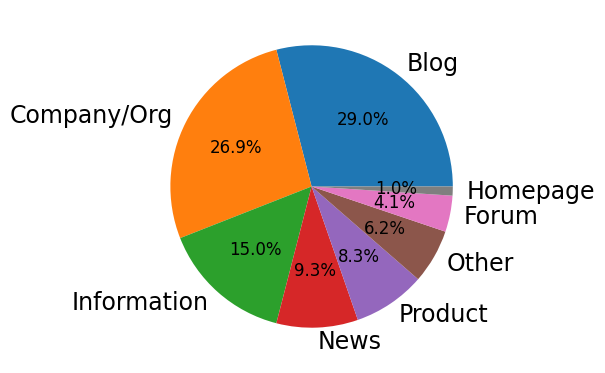

In [16]:
import pandas as pd
categories = pd.read_csv('categories.csv')
real_world = categories[~categories['Filename'].str.contains("WebSight", case=False)].replace({"Company/Organization Site": "Company/Org", "Product Page": "Product", "Information Site": "Information", "News Site": "News"})
# print the distribution of categories
# print(real_world['Category'].value_counts())

# draw a pie chart to visualize the distribution of categories
import matplotlib.pyplot as plt
# font size of x ticks
plt.rc('xtick', labelsize=17)
plt.figure(figsize=(6, 6))
real_world['Category'].value_counts().plot.pie(autopct='%1.1f%%')
# plt.title("Distribution of Website Categories in Real World Data")
plt.ylabel('')
plt.tight_layout()
plt.savefig('categories_pie_chart.pdf', bbox_inches='tight')